In [1]:
# 引用需要的library
import numpy as np
import helper
import joblib
import os
import jieba
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import plot_tree

In [2]:
# 从文本文件中读数据
# 读取到的内容
# X=评论（string）， y=情感分类（0/1）
folder_path = './user_comments'  # 请将此处替换为您的文件夹路径
# 使用CountVectorizer进行文本向量化
vectorizer = CountVectorizer()
# vectorizer = TfidfVectorizer()
X, y = helper.Read_comments_from_file(folder_path=folder_path, vectorizer=vectorizer)
# X=稀疏矩阵（int），y=情感分类（0/1）


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/d6/mm5k9h3n5_924kj876nnys4w0000gn/T/jieba.cache
Loading model cost 0.322 seconds.
Prefix dict has been built successfully.


./user_comments/neg/neg.1256.txt has exception
./user_comments/neg/neg.20.txt has exception
./user_comments/neg/neg.2367.txt has exception
./user_comments/neg/neg.404.txt has exception
./user_comments/neg/neg.2414.txt has exception
./user_comments/neg/neg.2372.txt has exception
./user_comments/neg/neg.1902.txt has exception
./user_comments/neg/neg.2748.txt has exception
./user_comments/neg/neg.2833.txt has exception
./user_comments/neg/neg.406.txt has exception
./user_comments/neg/neg.348.txt has exception
./user_comments/neg/neg.1687.txt has exception
./user_comments/neg/neg.361.txt has exception
./user_comments/neg/neg.2749.txt has exception
./user_comments/neg/neg.573.txt has exception
./user_comments/neg/neg.1724.txt has exception
./user_comments/neg/neg.761.txt has exception
./user_comments/neg/neg.2177.txt has exception
./user_comments/neg/neg.2611.txt has exception
./user_comments/neg/neg.2639.txt has exception
./user_comments/neg/neg.2823.txt has exception
./user_comments/neg/n

In [3]:
data_set = helper.DataSet(sample_count=X.size, X=X, y=y)
all_classification_models = helper.Make_model_classifier()
# 构建预测模型列表
my_classification_models = []

for model in all_classification_models:
    my_classification_models.append(helper.PredictModel(model, data_set))

# 训练 & 预测
for model in my_classification_models:
    model.fit()
    model.predict()
    # 打印预测结果
    print(f"{model.model_name}({model.X_train_pre.shape[0]}), {model.train_duration}, {model.pred_duration}, {model.get_eval()}")
    model.save()

print("执行结束!!!")

KNeighborsClassifier(4611), 0.15, 1.03, 0.6287944492627927
DecisionTreeClassifier(4611), 5.03, 0.05, 0.834345186470078
SVC(4611), 213.82, 73.77, 0.6964440589765828
RandomForestClassifier(4611), 9.41, 0.11, 0.8959236773633998
AdaBoostClassifier(4611), 34.19, 0.78, 0.8143972246313964
GradientBoostingClassifier(4611), 136.73, 0.05, 0.834345186470078
XGBClassifier(4611), 32.71, 0.09, 0.8898525585429314
LGBMClassifier(4611), 2.72, 0.05, 0.8985255854293148
执行结束!!!


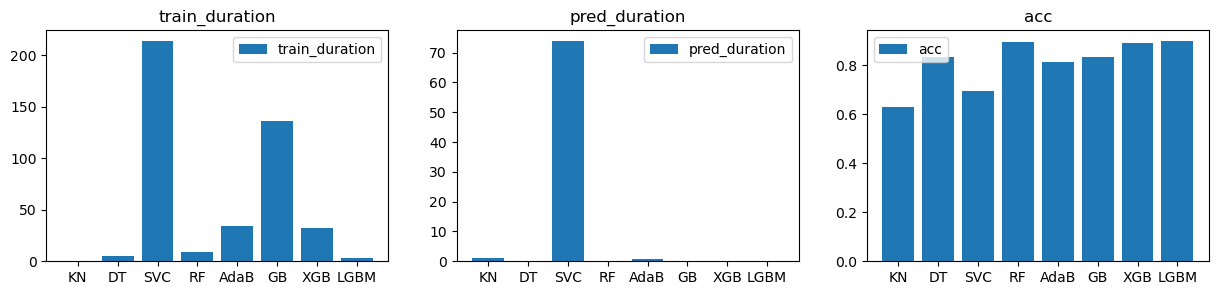

In [4]:
# 柱状图，能够一眼看出各数据的大小，比较数据之间的差别
result_data = helper.Result_analysis(my_classification_models)
helper.Plot_analysis(result_data)

In [5]:
# TODO
# 1. 是否要处理读取文件时，报异常的文件？
# 2. 对稀疏矩阵的数据预处理：标准化/归一化？PCA降维？
# 3. 优化图标显示：显示中文？
# 4. 优化调用文本向量话的算法？